* CS-22013  Ayesha Ahmed
* CS-22022  Urooj Fatima
* Cs-22037  Maida Jilani

In [ ]:
!pip install ipywidgets

In [ ]:
# Standard Library and Core Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Model Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization
)

# Model Training Components
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau
)

from keras.regularizers import l2


# Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)

# Data Processing and Utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# Interactive Widgets
from IPython.display import display
from ipywidgets import FileUpload, VBox, Button, Output

# Loading the Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Visualizing the Dataset

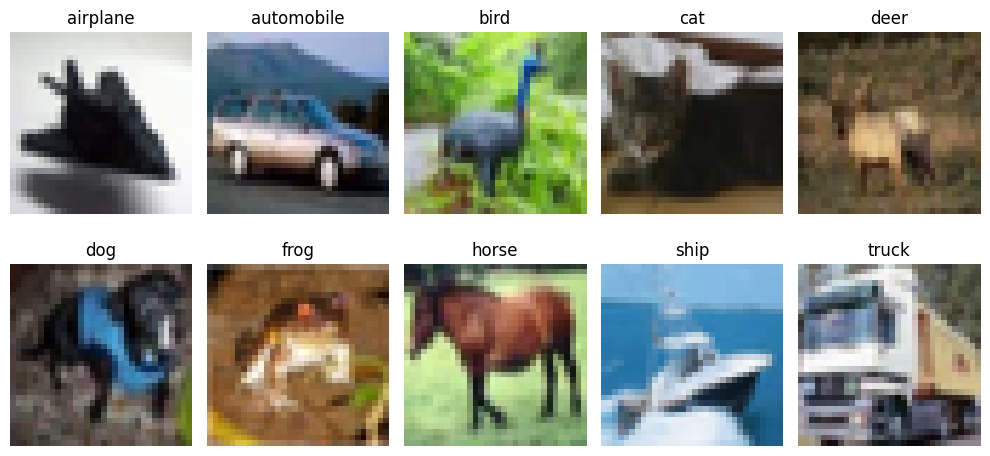

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 10 examples, one for each class
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx])
    plt.title(cifar10_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Relabeling the output as binary; 0 --> Vehicles, 1 --> animals

In [ ]:
vehicle_labels = [0, 1, 8, 9]
# Relabel: 0 for vehicle, 1 for animal
y_train = np.where(np.isin(y_train, vehicle_labels), 0, 1)
y_test= np.where(np.isin(y_test, vehicle_labels), 0, 1)

Flattening the arrays

In [ ]:
# Flatten label arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


## Visualizing Vehicles and Animals

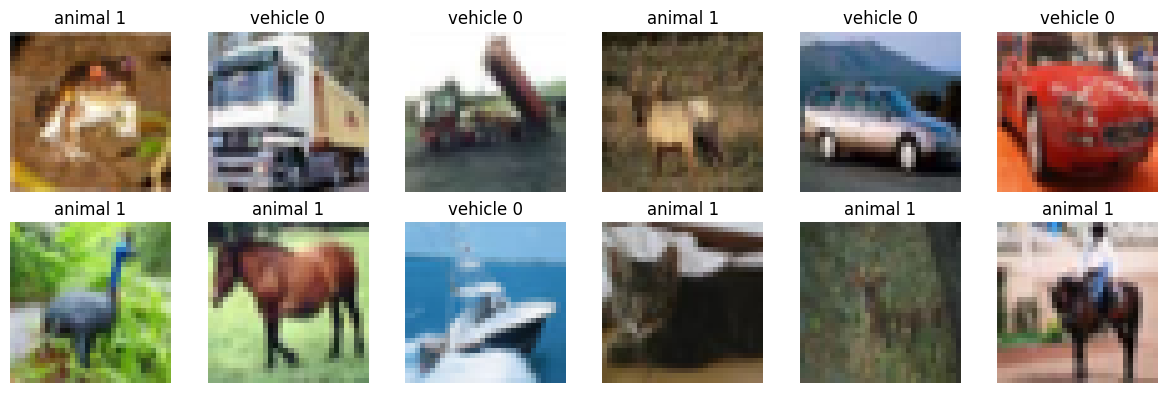

In [ ]:
# #Visualization function
def show_images(X, y_binary, n=12):
    plt.figure(figsize=(12, 4))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(X[i],interpolation='nearest')
        label = 'animal 1' if y_binary[i] == 1 else 'vehicle 0'
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show 12 example images

show_images(X_train, y_train, n=12)


## Visualizing class distribution in Train data

Class Distribution in Train Set



<ipython-input-24-32296db5230a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_counts, palette='viridis')


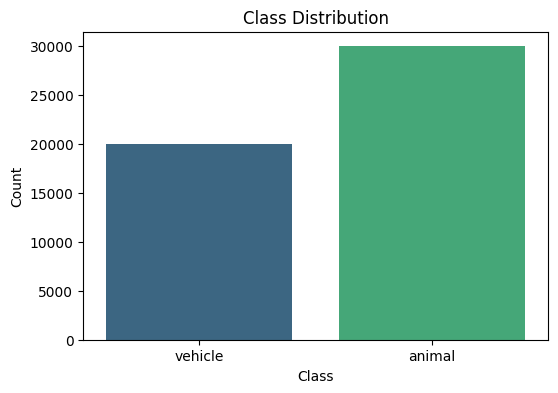

In [ ]:
import seaborn as sns

# Count the occurrences of each class
class_counts = np.bincount(y_train)

# Define the class names
class_names = ['vehicle', 'animal']

print("Class Distribution in Train Set\n")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_names, y=class_counts, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Visualizing class distribution in Test data

Class Distribution in Test Set



<ipython-input-25-04eb75d3c92b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_counts, palette='viridis')


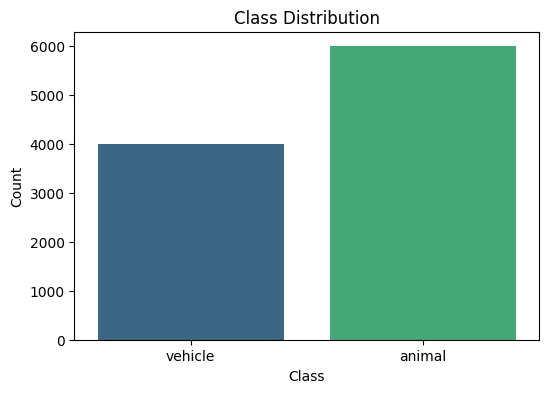

In [ ]:
# Count the occurrences of each class
class_counts = np.bincount(y_test)


class_names = ['vehicle', 'animal']

print("Class Distribution in Test Set\n")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_names, y=class_counts, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Normalize the Images between 0-1

In [ ]:
# Normalize images to [0, 1] range
X_train = X_train / 255.0
# X_valid = X_valid / 255.0
X_test = X_test/255.0

# Splitting Dataset

In [ ]:
# Split training into three different sets training and validation
# Split in 80:20 ratio for train:valid
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)
# Split in 70:30 ratio for train:valid
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)
# Split in 60:40 ratio for train:valid
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train, y_train, test_size=0.4, stratify=y_train)

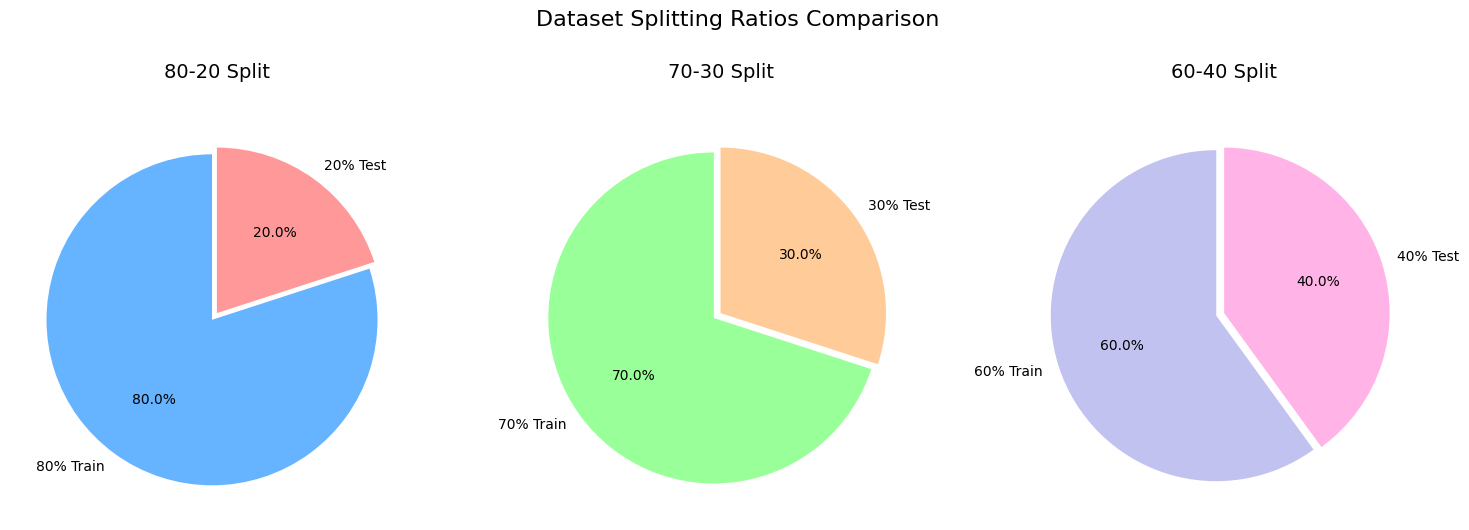

In [ ]:


split_labels = ['80% Train', '20% Test', '70% Train', '30% Test', '60% Train', '40% Test']
sizes = [80, 20, 70, 30, 60, 40]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']  # Custom colors

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for 3 splits

# 80-20 Split
axes[0].pie(sizes[:2], labels=split_labels[:2], autopct='%1.1f%%',
            colors=colors[:2], startangle=90, explode=(0.05, 0))
axes[0].set_title('80-20 Split', fontsize=14, pad=20)

# 70-30 Split
axes[1].pie(sizes[2:4], labels=split_labels[2:4], autopct='%1.1f%%',
            colors=colors[2:4], startangle=90, explode=(0.05, 0))
axes[1].set_title('70-30 Split', fontsize=14, pad=20)

# 60-40 Split
axes[2].pie(sizes[4:6], labels=split_labels[4:6], autopct='%1.1f%%',
            colors=colors[4:6], startangle=90, explode=(0.05, 0))
axes[2].set_title('60-40 Split', fontsize=14, pad=20)


plt.suptitle('Dataset Splitting Ratios Comparison', fontsize=16, y=1.05)
plt.tight_layout()
plt.savefig('dataset_splits_piechart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

## CNN Models

In [ ]:
# Model 1: Baseline CNN
def build_model_1(lr=0.001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu',kernel_regularizer=l2(0.001)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Deeper CNN with more filters and dropout
def build_model_2(lr=0.0005):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model 3: Wider CNN with batch normalization
def build_model_3(lr=0.0001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the models
model1 = build_model_1()
model2 = build_model_2()
model3 = build_model_3()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,825 (1.76 MB)

 Trainable params: 461,825 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,185 (364.00 KB)

 Trainable params: 93,185 (364.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,361 (653.75 KB)

 Trainable params: 167,169 (653.00 KB)

 Non-trainable params: 192 (768.00 B)

Adjusting class weights to handle the imbalance between vehicle and animal training images

In [ ]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train1),
    y=y_train1
)

class_weights = dict(enumerate(class_weights))
class_weights

{0: np.float64(1.25), 1: np.float64(0.8333333333333334)}

Early stopping to restore to the best weights

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',       # What to monitor (val_loss or val_accuracy)
    patience=6,               # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore the weights of the best epoch
)

## Training Model 1

* Train to test ratio is 80:20
* Learning rate is lr=0.001
* Convolution layers = 1 layer
* Filters in Conv Layer: 32
* Activation Fn: ReLu + Sigmoid (for output layer)

In [ ]:
history1 = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, batch_size=64, callbacks=early_stop,class_weight=class_weights)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8213 - loss: 0.4508 - val_accuracy: 0.8983 - val_loss: 0.2963
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8920 - loss: 0.3003 - val_accuracy: 0.8932 - val_loss: 0.2972
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8999 - loss: 0.2820 - val_accuracy: 0.9049 - val_loss: 0.2624
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9014 - loss: 0.2714 - val_accuracy: 0.9015 - val_loss: 0.2717
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9074 - loss: 0.2611 - val_accuracy: 0.9130 - val_loss: 0.2522
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9054 - loss: 0.2581 - val_accuracy: 0.9099 - val_loss: 0.2603
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9088 - loss: 0.2553 - val_accuracy: 0.9116 - val_loss: 0.2558
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9125 - loss: 0.2459 - val_accuracy: 0

## Train Model 2

* Train to test ratio is 70:30
* Learning rate is lr=0.0005
* Convolution layers = 2 layers
* Activation Fn: ReLu + Sigmoid (for output layer)

In [ ]:
history2 = model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=30, batch_size=64, callbacks=early_stop,class_weight=class_weights)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7625 - loss: 0.4744 - val_accuracy: 0.8867 - val_loss: 0.2809
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8846 - loss: 0.2909 - val_accuracy: 0.8988 - val_loss: 0.2576
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8941 - loss: 0.2719 - val_accuracy: 0.9106 - val_loss: 0.2243
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9010 - loss: 0.2550 - val_accuracy: 0.9143 - val_loss: 0.2185
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9044 - loss: 0.2401 - val_accuracy: 0.9157 - val_loss: 0.2133
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9106 - loss: 0.2301 - val_accuracy: 0.9165 - val_loss: 0.2099
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9114 - loss: 0.2311 - val_accuracy: 0.8980 - val_loss: 0.2576
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9135 - loss: 0.2260 - val_accuracy: 

## Train Model 3

* Train to test ratio is 80:20
* Learning rate is lr=0.0001
* Convolution layers = 2 layer
* Activation Fn: ReLu + Sigmoid (for output layer)

In [ ]:
history3 = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, batch_size=64, callbacks=early_stop,class_weight=class_weights)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7878 - loss: 0.4853 - val_accuracy: 0.8981 - val_loss: 0.2538
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8931 - loss: 0.2660 - val_accuracy: 0.9055 - val_loss: 0.2333
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9068 - loss: 0.2363 - val_accuracy: 0.9123 - val_loss: 0.2189
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9118 - loss: 0.2178 - val_accuracy: 0.9180 - val_loss: 0.2101
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9220 - loss: 0.1985 - val_accuracy: 0.9029 - val_loss: 0.2311
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9242 - loss: 0.1836 - val_accuracy: 0.9099 - val_loss: 0.2410
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9339 - loss: 0.1725 - val_accuracy: 0.9181 - val_loss: 0.2015
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9339 - loss: 0.1648 - val_accuracy: 0.

# Accuracy per epcohs

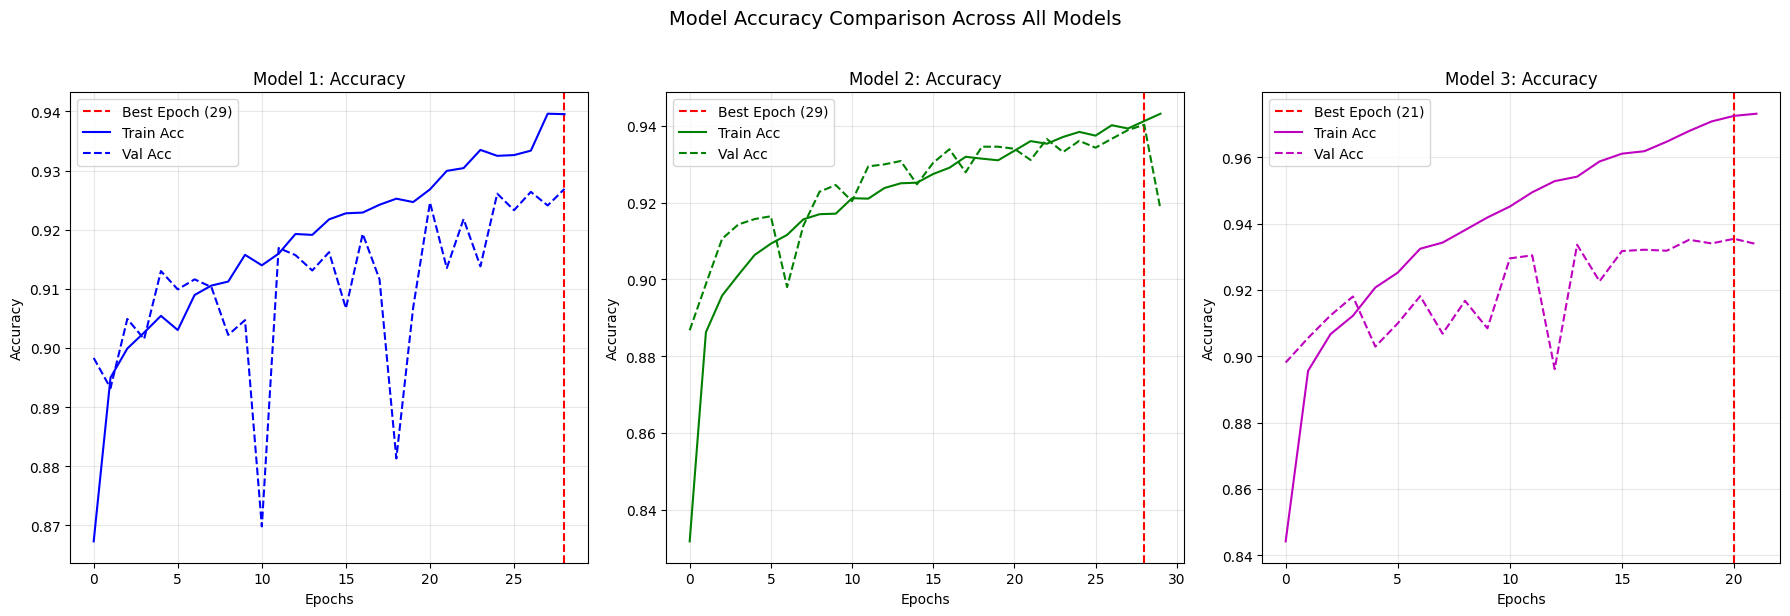

In [ ]:
plt.figure(figsize=(18, 6))

# Model 1
plt.subplot(1, 3, 1)
best_epoch = np.argmax(history1.history['val_accuracy'])
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch + 1})')
plt.plot(history1.history['accuracy'], 'b-', label='Train Acc')
plt.plot(history1.history['val_accuracy'], 'b--', label='Val Acc')
plt.title('Model 1: Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Model 2
plt.subplot(1, 3, 2)  # Second position
best_epoch = np.argmax(history2.history['val_accuracy'])
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch + 1})')
plt.plot(history2.history['accuracy'], 'g-', label='Train Acc')
plt.plot(history2.history['val_accuracy'], 'g--', label='Val Acc')
plt.title('Model 2: Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Model 3
plt.subplot(1, 3, 3)  # Third position
best_epoch = np.argmax(history3.history['val_accuracy'])
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch + 1})')
plt.plot(history3.history['accuracy'], 'm-', label='Train Acc')
plt.plot(history3.history['val_accuracy'], 'm--', label='Val Acc')
plt.title('Model 3: Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Model Accuracy Comparison Across All Models', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Models Loss Comparison

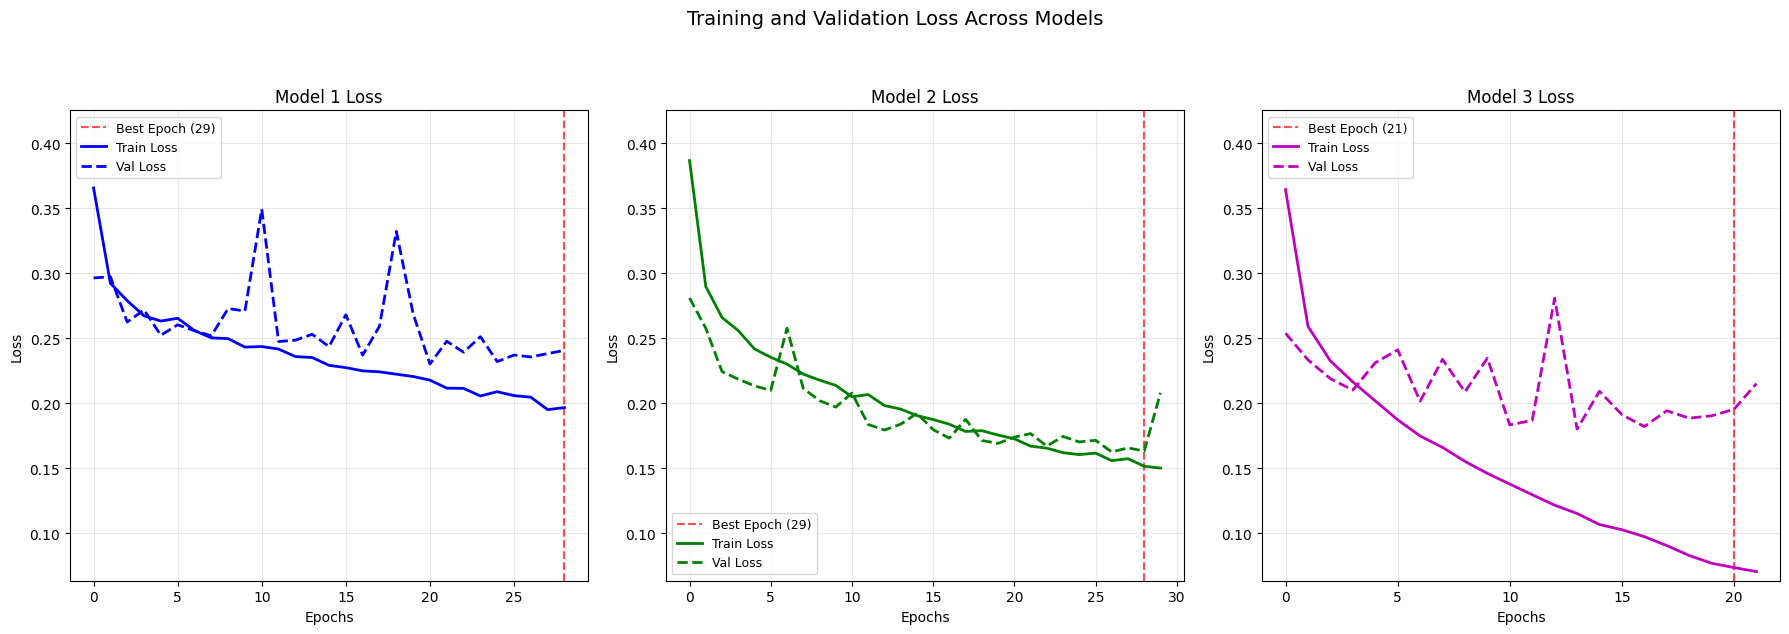

In [ ]:
plt.figure(figsize=(18, 6))

# Define consistent colors and styles
model_colors = ['b', 'g', 'm']
model_names = ['Model 1', 'Model 2', 'Model 3']
histories = [history1, history2, history3]
line_styles = ['-', '--', ':']

for i, (history, color, name) in enumerate(zip(histories, model_colors, model_names)):
    best_epoch = np.argmax(history.history['val_accuracy'])

    plt.subplot(1, 3, i+1)
    plt.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.7, label=f'Best Epoch ({best_epoch+1})')


    plt.plot(history.history['loss'], color+line_styles[0], label='Train Loss', linewidth=2)
    plt.plot(history.history['val_loss'], color+line_styles[1], label='Val Loss', linewidth=2)

    plt.title(f'{name} Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.3)

    all_losses = np.concatenate([history.history['loss'] + history.history['val_loss'] for history in histories])
    plt.ylim(bottom=min(all_losses)*0.9, top=max(all_losses)*1.1)

plt.suptitle('Training and Validation Loss Across Models', fontsize=14, y=1.05)
plt.tight_layout()
plt.savefig('model_loss_comparison.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

## ROC Curves

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


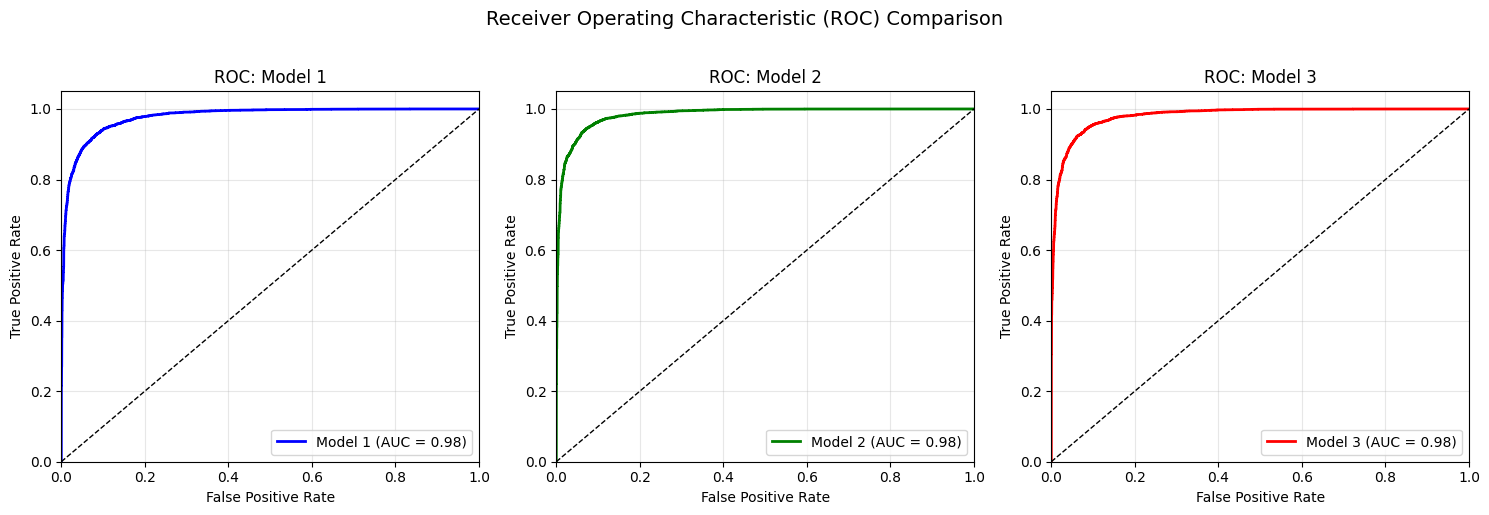

In [ ]:
plt.figure(figsize=(15, 5))

# Define model properties
models = [('Model 1', model1, 'blue'),
          ('Model 2', model2, 'green'),
          ('Model 3', model3, 'red')]

for i, (name, model, color) in enumerate(models, 1):
    plt.subplot(1, 3, i)

    # Get predictions and calculate ROC
    y_scores = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line

    # Formatting
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC: {name}')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)

plt.suptitle('Receiver Operating Characteristic (ROC) Comparison', y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig('roc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## PR Curves

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


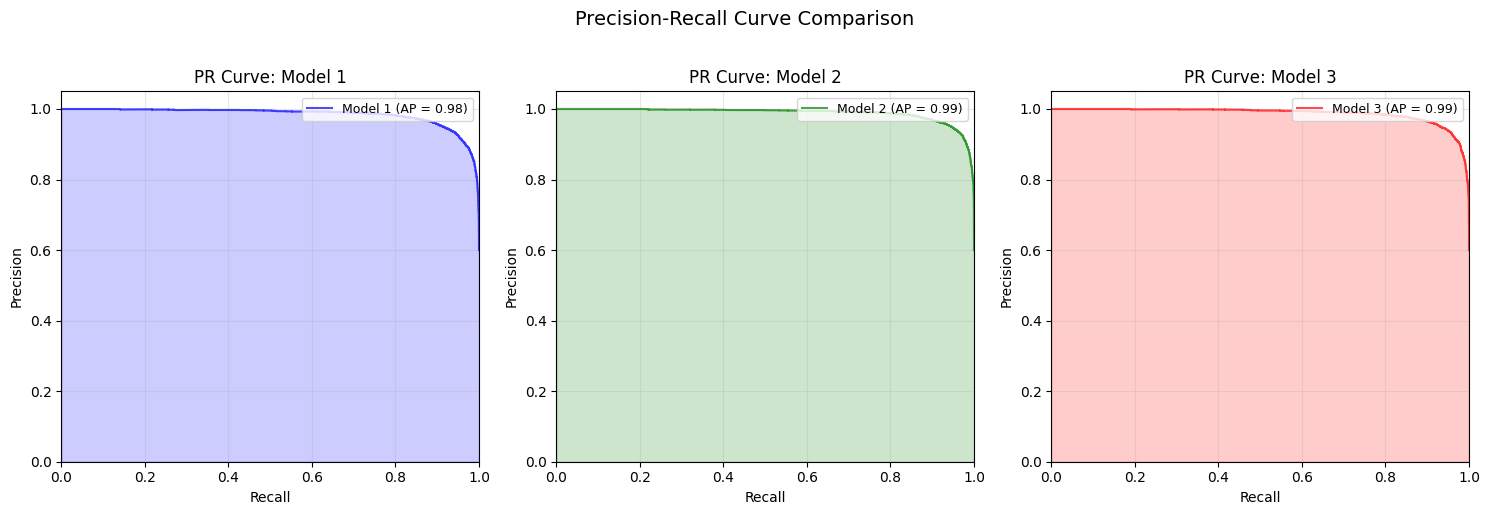

In [ ]:
plt.figure(figsize=(15, 5))

# Define model properties
models = [('Model 1', model1, 'blue'),
          ('Model 2', model2, 'green'),
          ('Model 3', model3, 'red')]

for i, (name, model, color) in enumerate(models, 1):
    plt.subplot(1, 3, i)

    # Get predictions and calculate PR curve
    y_scores = model.predict(X_test).ravel()
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)

    # Plot PR curve
    plt.step(recall, precision, color=color, alpha=0.7, where='post',
             label=f'{name} (AP = {average_precision:.2f})')
    plt.fill_between(recall, precision, alpha=0.2, color=color)

    # Formatting
    plt.xlabel('Recall', fontsize=10)
    plt.ylabel('Precision', fontsize=10)
    plt.title(f'PR Curve: {name}', fontsize=12)
    plt.legend(loc='upper right', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

plt.suptitle('Precision-Recall Curve Comparison', y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig('pr_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Accuracy and F1_Scores

Model 1

In [ ]:
# Predict and calculate F1 score
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
f1_1 = f1_score(y_test, y_pred1)

accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")
print(f"F1_Score: {f1_1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9249
F1_Score: 0.9379184921881458


Model 2

In [ ]:
# Predict and calculate F1 score
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")
f1_2 = f1_score(y_test, y_pred2)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")
print(f"F1_Score: {f1_2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9383
F1_Score: 0.9487072907141075


Model 3

In [ ]:
# Predict and calculate F1 score
y_pred3 = (model3.predict(X_test) > 0.5).astype("int32")
f1_3 = f1_score(y_test, y_pred3)

accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")
print(f"F1_Score: {f1_3}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9329
F1_Score: 0.9445041766603258


# Classification Reports

Model 1

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4000
           1       0.93      0.95      0.94      6000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Model 2

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4000
           1       0.95      0.95      0.95      6000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Model 3

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      4000
           1       0.94      0.95      0.94      6000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



## Confusion Matrix

Model 1

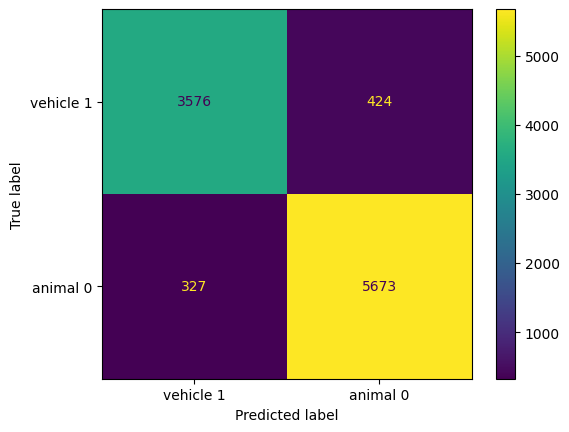

In [ ]:
class_names = ['vehicle 1', 'animal 0']

cm1 = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_names)
disp.plot()
plt.show()

Model 2

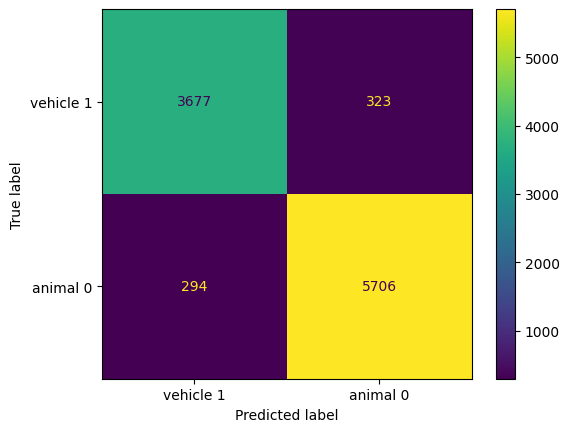

In [ ]:
class_names = ['vehicle 1', 'animal 0']


cm2 = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)
disp.plot()
plt.show()

Model 3

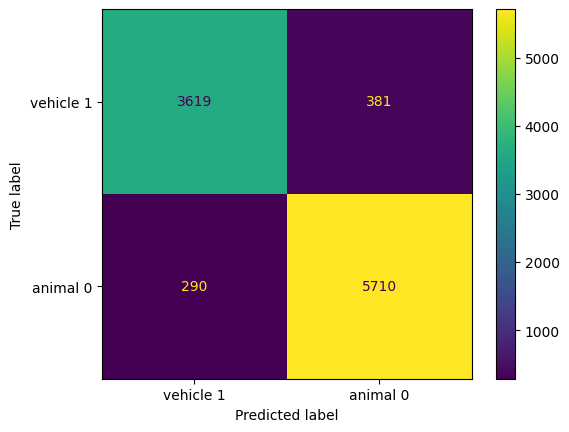

In [ ]:
class_names = ['vehicle 1', 'animal 0']

cm3 = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=class_names)
disp.plot()
plt.show()

**Prediction made on Model 1**

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize
    img_array = image.img_to_array(img)                   # Convert to array
    img_array = img_array /255                      # Normalize
    img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension
    return img_array

# Example usage
img_path = '/content/xar.jpg'
processed_img = preprocess_image(img_path)

prediction = model1.predict(processed_img)
predicted_class = 'animal' if prediction[0][0] > 0.5 else 'vehicle'
confidence = prediction[0][0] if predicted_class == 'animal' else 1 - prediction[0][0]

print(f"Predicted: {predicted_class} (Confidence: {confidence:.2%})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted: vehicle (Confidence: 99.98%)


Prediction made on Model 2

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize
    img_array = image.img_to_array(img)                   # Convert to array
    img_array = img_array /255                     # Normalize
    img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension
    return img_array

# Example usage
img_path = '/content/xar.jpg'
processed_img = preprocess_image(img_path)

prediction = model2.predict(processed_img)
predicted_class = 'animal' if prediction[0][0] > 0.5 else 'vehicle'
confidence = prediction[0][0] if predicted_class == 'animal' else 1 - prediction[0][0]

print(f"Predicted: {predicted_class} (Confidence: {confidence:.2%})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Predicted: vehicle (Confidence: 99.94%)


Prediction made on Model 3

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize
    img_array = image.img_to_array(img)                   # Convert to array
    img_array = img_array /255                      # Normalize
    img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension
    return img_array

# Example usage
img_path = '/content/xar.jpg'
processed_img = preprocess_image(img_path)

prediction = model3.predict(processed_img)
predicted_class = 'animal' if prediction[0][0] > 0.5 else 'vehicle'
confidence = prediction[0][0] if predicted_class == 'animal' else 1 - prediction[0][0]

print(f"Predicted: {predicted_class} (Confidence: {confidence:.2%})")




# **Upload your Image**

Classify the images based on three models

In [ ]:
# Label mapping
class_names = ['vehicle', 'animal']

# Image preprocessing function
def preprocess_uploaded_image(img_file):
    img = image.load_img(img_file, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

# Function to display result from all 3 models in your style
def on_upload_change(change):
    uploaded_file = uploader.value
    if uploaded_file:
        for filename, fileinfo in uploaded_file.items():
            with open(filename, "wb") as f:
                f.write(fileinfo["content"])

            # Preprocess and predict
            img_array, orig_img = preprocess_uploaded_image(filename)

            predictions = []
            for i, model in enumerate([model1, model2, model3], start=1):
                prediction = model.predict(img_array)[0][0]
                predicted_class = 'animal' if prediction > 0.5 else 'vehicle'
                confidence = prediction if predicted_class == 'animal' else 1 - prediction
                predictions.append((f"Model {i}", predicted_class, confidence))

            # Display image and predictions
            output.clear_output()
            with output:
                plt.imshow(np.array(orig_img))  # Convert PIL to NumPy array
                plt.axis('off')
                plt.title("Uploaded Image")
                plt.show()

                for model_name, pred_class, conf in predictions:
                    print(f"{model_name} Predicted: {pred_class} (Confidence: {conf:.2%})")

# Upload widget
uploader = FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')

# Output widget
output = Output()

# Display UI
display(VBox([uploader, output]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
